In [49]:
import kclusters
import pandas as pd
import numpy as np

data: pd.DataFrame = pd.read_csv(
    filepath_or_buffer="../data_processing/cleaned_dataset.csv"
)  # .sample(frac=0.5)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68236 entries, 0 to 68235
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        68236 non-null  int64  
 1   duration_s        68236 non-null  float64
 2   explicit          68236 non-null  int64  
 3   danceability      68236 non-null  float64
 4   energy            68236 non-null  float64
 5   key               68236 non-null  int64  
 6   loudness          68236 non-null  float64
 7   mode              68236 non-null  int64  
 8   speechiness       68236 non-null  float64
 9   acousticness      68236 non-null  float64
 10  instrumentalness  68236 non-null  float64
 11  liveness          68236 non-null  float64
 12  valence           68236 non-null  float64
 13  tempo             68236 non-null  float64
 14  time_signature    68236 non-null  int64  
 15  track_genre       68236 non-null  object 
dtypes: float64(10), int64(5), object(1)
memo

,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,202.000,0,0.265,0.261,0,-15.024,0,0.0452,0.97000,0.018600,0.0947,0.204,87.589,5,romance
1,0,202.693,0,0.848,0.825,4,-4.177,0,0.0899,0.39700,0.000000,0.0498,0.803,102.047,4,latino
2,0,311.120,0,0.850,0.818,5,-8.624,1,0.0905,0.12400,0.001250,0.3490,0.840,105.268,4,disco
3,0,236.306,0,0.716,0.962,0,-3.094,1,0.0334,0.00309,0.000005,0.4450,0.945,126.017,4,party
4,0,297.026,0,0.801,0.631,4,-6.958,0,0.0399,0.69700,0.000103,0.0481,0.885,92.528,4,salsa


In [50]:
# Drop columns
data_mod1: pd.DataFrame = data.copy().drop(columns=["track_genre", "popularity"])

data_mod1.info()
data_mod1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68236 entries, 0 to 68235
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_s        68236 non-null  float64
 1   explicit          68236 non-null  int64  
 2   danceability      68236 non-null  float64
 3   energy            68236 non-null  float64
 4   key               68236 non-null  int64  
 5   loudness          68236 non-null  float64
 6   mode              68236 non-null  int64  
 7   speechiness       68236 non-null  float64
 8   acousticness      68236 non-null  float64
 9   instrumentalness  68236 non-null  float64
 10  liveness          68236 non-null  float64
 11  valence           68236 non-null  float64
 12  tempo             68236 non-null  float64
 13  time_signature    68236 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 7.3 MB


,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,202.000,0,0.265,0.261,0,-15.024,0,0.0452,0.97000,0.018600,0.0947,0.204,87.589,5
1,202.693,0,0.848,0.825,4,-4.177,0,0.0899,0.39700,0.000000,0.0498,0.803,102.047,4
2,311.120,0,0.850,0.818,5,-8.624,1,0.0905,0.12400,0.001250,0.3490,0.840,105.268,4
3,236.306,0,0.716,0.962,0,-3.094,1,0.0334,0.00309,0.000005,0.4450,0.945,126.017,4
4,297.026,0,0.801,0.631,4,-6.958,0,0.0399,0.69700,0.000103,0.0481,0.885,92.528,4


In [51]:
# Normalize the data
data_mod2 = data_mod1.copy()
data_mod2 = data_mod2.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

data_mod2.info()
data_mod2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68236 entries, 0 to 68235
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_s        68236 non-null  float64
 1   explicit          68236 non-null  float64
 2   danceability      68236 non-null  float64
 3   energy            68236 non-null  float64
 4   key               68236 non-null  float64
 5   loudness          68236 non-null  float64
 6   mode              68236 non-null  float64
 7   speechiness       68236 non-null  float64
 8   acousticness      68236 non-null  float64
 9   instrumentalness  68236 non-null  float64
 10  liveness          68236 non-null  float64
 11  valence           68236 non-null  float64
 12  tempo             68236 non-null  float64
 13  time_signature    68236 non-null  float64
dtypes: float64(14)
memory usage: 7.3 MB


,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.040963,0.0,0.269583,0.261,0.000000,0.638274,0.0,0.046839,0.973896,0.018600,0.0947,0.205025,0.359898,1.0
1,0.041109,0.0,0.862665,0.825,0.363636,0.838910,0.0,0.093161,0.398594,0.000000,0.0498,0.807035,0.419305,0.8
2,0.064073,0.0,0.864700,0.818,0.454545,0.756654,1.0,0.093782,0.124498,0.001250,0.3490,0.844221,0.432539,0.8
3,0.048228,0.0,0.728383,0.962,0.000000,0.858942,1.0,0.034611,0.003102,0.000005,0.4450,0.949749,0.517796,0.8
4,0.061088,0.0,0.814852,0.631,0.363636,0.787470,0.0,0.041347,0.699799,0.000103,0.0481,0.889447,0.380192,0.8


In [52]:
# Convert the dataframe to a matrix
data_matrix: list[list[float | int]] = data_mod2.values.tolist()

# Remove the index
data_matrix = [record[1:] for record in data_matrix]

In [53]:
model_set: list[kclusters.K_Clusters] = [
    kclusters.K_Clusters(
        trainingMatrix=data_matrix,
        kGroups=cluster_size,
    )
    for cluster_size in range(10, 21)  # 10-20 inclusive
]

best_score: float = -1 * float("inf")
best_model: kclusters.K_Clusters = None

for model in model_set:
    print(f"Training model with {model.kGroups} clusters...")
    epochs: int = model.Train()
    print(f"Model converged in {epochs} epochs.")

    if model.silhouetteScore > best_score:
        best_score = model.silhouetteScore
        best_model = model  

print(f"Best score: {best_score}")
print(f"Best model: {best_model.kGroups}")

Training model with 10 clusters...
Model converged in 20 epochs.
Training model with 11 clusters...
Model converged in 33 epochs.
Training model with 12 clusters...
Model converged in 25 epochs.
Training model with 13 clusters...
Model converged in 34 epochs.
Training model with 14 clusters...
Model converged in 70 epochs.
Training model with 15 clusters...
Model converged in 25 epochs.
Training model with 16 clusters...
Model converged in 67 epochs.
Training model with 17 clusters...
Model converged in 67 epochs.
Training model with 18 clusters...
Model converged in 37 epochs.
Training model with 19 clusters...
Model converged in 77 epochs.
Training model with 20 clusters...
Model converged in 52 epochs.
Best score: 0.3541
Best model: 14


In [54]:
centroid_collection: list[list[float]] = [
    cluster.centroid for cluster in best_model.clusters
]
means = np.mean(centroid_collection, axis=0)
stds = np.std(centroid_collection, axis=0)

for cluster in best_model.clusters:
    print(f"Cluster: {cluster.name}")
    print(f"Centroid: {cluster.centroid}")

    z_scores = (cluster.centroid - means) / stds
    abs_z_scores = np.abs(z_scores)
    dissimilar_indices: list[int] = np.argsort(abs_z_scores)[-3:][::-1]

    full_label: str = ""
    for index in dissimilar_indices:
        direction: int = 1 if z_scores[index] > 0 else -1
        column_name: str = data_mod2.columns[index]
        full_label += f"{"negative" if direction < 0 else "positive"} {column_name}, "

    cluster.name = full_label
    print(f"Indices: {dissimilar_indices}")
    print(f"Name: {full_label}")
    print("\n")

Cluster: cluster_0
Centroid: [0.002, 0.3814, 0.1952, 0.4233, 0.5421, 1.0, 0.0548, 0.871, 0.8486, 0.1557, 0.2139, 0.4279, 0.7312]
Indices: [4 1 2]
Name: negative key, negative explicit, negative danceability, 


Cluster: cluster_1
Centroid: [0.6529, 0.5654, 0.7256, 0.4613, 0.7096, 0.7207, 0.9325, 0.8084, 0.0, 0.7626, 0.4181, 0.3954, 0.7051]
Indices: [ 9  6 12]
Name: positive instrumentalness, positive mode, negative tempo, 


Cluster: cluster_2
Centroid: [0.0005, 0.4122, 0.2479, 0.4796, 0.5707, 0.0, 0.058, 0.8431, 0.8448, 0.1684, 0.213, 0.4394, 0.7353]
Indices: [4 2 1]
Name: negative key, negative danceability, negative explicit, 


Cluster: cluster_3
Centroid: [0.0, 0.5996, 0.7493, 0.1977, 0.8011, 0.0, 0.0839, 0.1608, 0.0267, 0.217, 0.5203, 0.5137, 0.7932]
Indices: [ 3  5 10]
Name: negative energy, negative loudness, positive liveness, 


Cluster: cluster_4
Centroid: [1.0, 0.6281, 0.7275, 0.1295, 0.7981, 1.0, 0.161, 0.1789, 0.0691, 0.2178, 0.4586, 0.5078, 0.795]
Indices: [3 0 5]
Name: 

In [60]:
data_mod3 = data_mod2.copy()
data_mod3["New Genre"] = None
data_mod3.info()

# Map genre names to songs
for cluster in best_model.clusters:
    for song_details in cluster.vectors:
        mask = (data_mod2.iloc[:, 1:] == song_details).all(axis=1)
        song: pd.DataFrame = data_mod2[mask]
        data_mod3.loc[mask, "New Genre"] = cluster.name

# Add the new genre column to the original dataframe
data_mod4 = data.copy().drop(columns=["track_genre"])
data_mod4["New Genre"] = data_mod3["New Genre"]
data_mod4.sort_values(by=["New Genre", "duration_s"], inplace=True)
data_mod4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68236 entries, 0 to 68235
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_s        68236 non-null  float64
 1   explicit          68236 non-null  float64
 2   danceability      68236 non-null  float64
 3   energy            68236 non-null  float64
 4   key               68236 non-null  float64
 5   loudness          68236 non-null  float64
 6   mode              68236 non-null  float64
 7   speechiness       68236 non-null  float64
 8   acousticness      68236 non-null  float64
 9   instrumentalness  68236 non-null  float64
 10  liveness          68236 non-null  float64
 11  valence           68236 non-null  float64
 12  tempo             68236 non-null  float64
 13  time_signature    68236 non-null  float64
 14  New Genre         0 non-null      object 
dtypes: float64(14), object(1)
memory usage: 7.8+ MB
<class 'pandas.core.frame.DataFrame'>
I

In [61]:
data_mod4.to_csv("../data_processing/new_genres.csv", index=False)

In [57]:
data_mod5 = pd.read_csv("../data_processing/new_genres.csv")  # .sample(frac=0.05)

In [58]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

tsne = TSNE(
    n_components=3,
    random_state=0,
    max_iter=1000,
    n_iter_without_progress=100,
    n_jobs=-1,
)
tsne_results = tsne.fit_transform(data_mod5.select_dtypes(exclude=["object"]))

/tmp/ipykernel_23293/3208758888.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap("tab20c")
/tmp/ipykernel_23293/3208758888.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


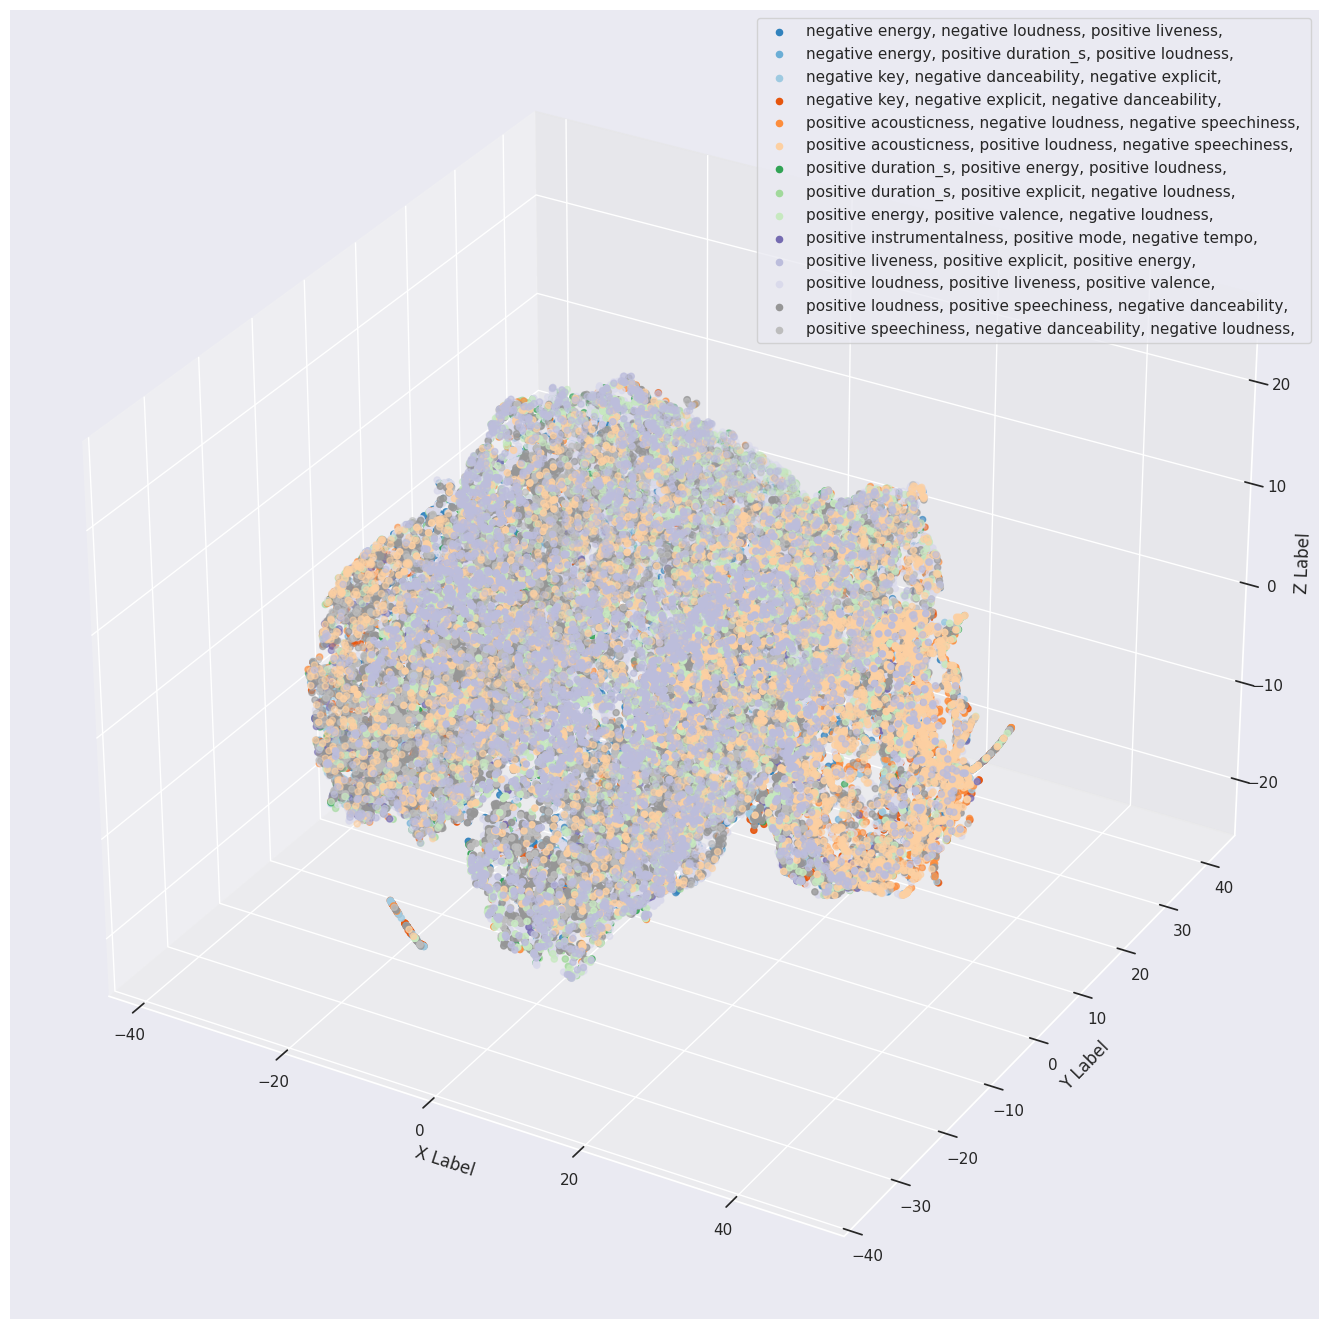

In [59]:
import matplotlib.cm as cm

genres = data_mod5["New Genre"].unique()
color_map = cm.get_cmap("tab20c")
colors = [color_map(i / len(genres)) for i in range(len(genres))]

fig, ax = plt.subplots(figsize=(17, 17), subplot_kw={"projection": "3d"})
for i, genre in enumerate(genres):
    mask = data_mod5["New Genre"] == genre
    ax.scatter(
        tsne_results[mask, 0],
        tsne_results[mask, 1],
        tsne_results[mask, 2],
        label=genre,
        c=colors[i],
    )

ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")

ax.legend()
plt.show()